# Лабораторная работа 3

Выполнил: Кузьмин Роман, ИУ5-25М

Датасет: [Steam Store Data](https://www.kaggle.com/datasets/amanbarthwal/steam-store-data?select=steam-games.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('steam-games.csv', sep=",")
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [5]:
# Первые 5 строк датасета
data.head()

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,win_support,mac_support,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,...,True,False,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,...,True,True,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",...,True,False,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",...,True,False,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,...,True,False,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0


In [6]:
data.dtypes

app_id                    int64
title                    object
release_date             object
genres                   object
categories               object
developer                object
publisher                object
original_price           object
discount_percentage      object
discounted_price         object
dlc_available             int64
age_rating                int64
content_descriptor       object
about_description        object
win_support                bool
mac_support                bool
linux_support              bool
awards                    int64
overall_review           object
overall_review_%        float64
overall_review_count    float64
recent_review            object
recent_review_%         float64
recent_review_count     float64
dtype: object

In [11]:
X_ALL = data[['dlc_available', 'age_rating', 'awards',
                 'overall_review_%', 'overall_review_count',
                 'recent_review_%', 'recent_review_count']]

In [13]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['overall_review_count'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((33997, 7), (8500, 7))

## Масштабирование
### Standart scaler

In [14]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,dlc_available,age_rating,awards,overall_review_%,overall_review_count,recent_review_%,recent_review_count
0,0.059480,-0.243299,0.546223,0.556673,164.890582,-0.218620,12.476879
1,0.273441,-0.243299,-0.244863,0.217150,45.839785,-0.681924,5.042973
2,-0.154480,4.110167,-0.244863,0.669848,0.200359,NaN,NaN
3,0.273441,4.110167,4.501651,0.896197,12.330205,0.774173,1.648393
4,2.840970,4.110167,-0.244863,0.160563,12.115840,-0.615737,0.995573
...,...,...,...,...,...,...,...
42492,-0.154480,-0.243299,-0.244863,NaN,NaN,NaN,NaN
42493,-0.154480,-0.243299,0.546223,NaN,NaN,NaN,NaN
42494,-0.154480,-0.243299,-0.244863,NaN,NaN,NaN,NaN
42495,-0.154480,-0.243299,-0.244863,NaN,NaN,NaN,NaN


In [15]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

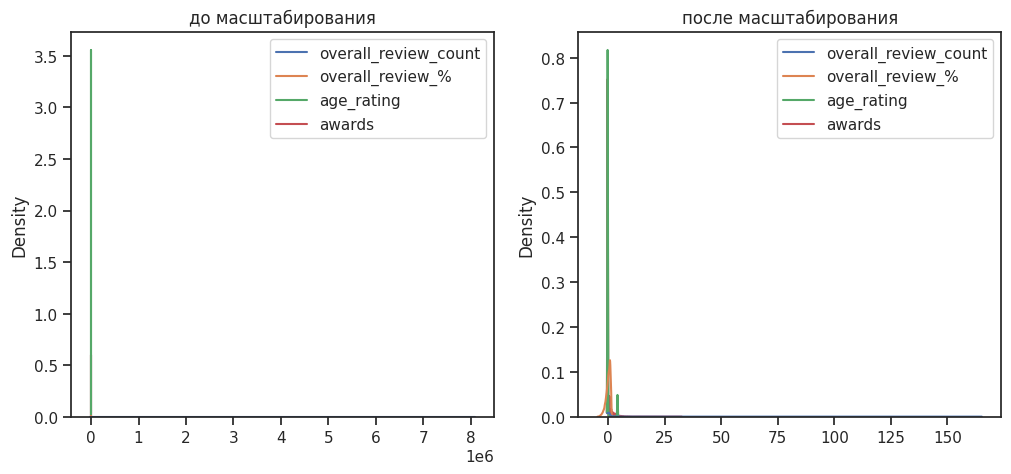

In [16]:
draw_kde(['overall_review_count', 'overall_review_%', 'age_rating', 'awards'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

### MeanTransform

In [17]:
class MeanNormalisation:

    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled

    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [18]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,dlc_available,age_rating,awards,overall_review_%,overall_review_count,recent_review_%,recent_review_count
count,42497.000000,42497.000000,42497.000000,40020.000000,40020.000000,5503.000000,5503.000000
mean,0.000007,0.000117,-0.000077,0.000815,-0.000002,-0.000197,0.001112
std,0.023369,0.229705,0.030832,0.176720,0.006063,0.160747,0.079776
min,-0.003603,-0.055770,-0.007626,-0.770811,-0.000311,-0.811932,-0.003624
25%,-0.003603,-0.055770,-0.007626,-0.090811,-0.000310,-0.077890,-0.003519
50%,-0.003603,-0.055770,-0.007626,0.039189,-0.000305,0.039132,-0.003206
75%,-0.003603,-0.055770,-0.007626,0.139189,-0.000277,0.113600,-0.002023
max,0.996397,0.944230,0.992374,0.229189,0.999689,0.188068,5.715936


In [19]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)
data_cs22_scaled_train.describe()

,dlc_available,age_rating,awards,overall_review_%,overall_review_count,recent_review_%,recent_review_count
count,3.399700e+04,3.399700e+04,3.399700e+04,3.200300e+04,3.200300e+04,4.359000e+03,4.359000e+03
mean,-5.420979e-19,4.232282e-18,4.571910e-19,3.968675e-17,1.604469e-20,-7.477896e-17,4.457193e-20
std,2.380461e-02,2.294797e-01,3.107322e-02,1.766204e-01,6.620080e-03,1.600843e-01,2.106215e-02
min,-3.603259e-03,-5.576963e-02,-7.626211e-03,-7.708112e-01,-3.111973e-04,-8.119323e-01,-3.623767e-03
25%,-3.603259e-03,-5.576963e-02,-7.626211e-03,-9.081117e-02,-3.098330e-04,-7.788972e-02,-3.519339e-03
50%,-3.603259e-03,-5.576963e-02,-7.626211e-03,3.918883e-02,-3.051196e-04,3.913156e-02,-3.206056e-03
75%,-3.603259e-03,-5.576963e-02,-7.626211e-03,1.391888e-01,-2.778318e-04,1.135996e-01,-2.005137e-03
max,9.963967e-01,9.442304e-01,9.923738e-01,2.291888e-01,9.996888e-01,1.880677e-01,9.963762e-01


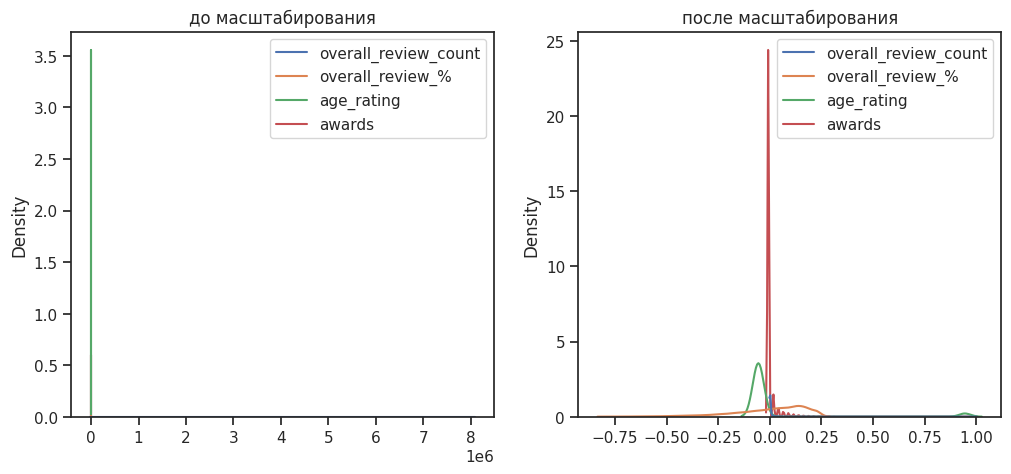

In [20]:
draw_kde(['overall_review_count', 'overall_review_%', 'age_rating', 'awards'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

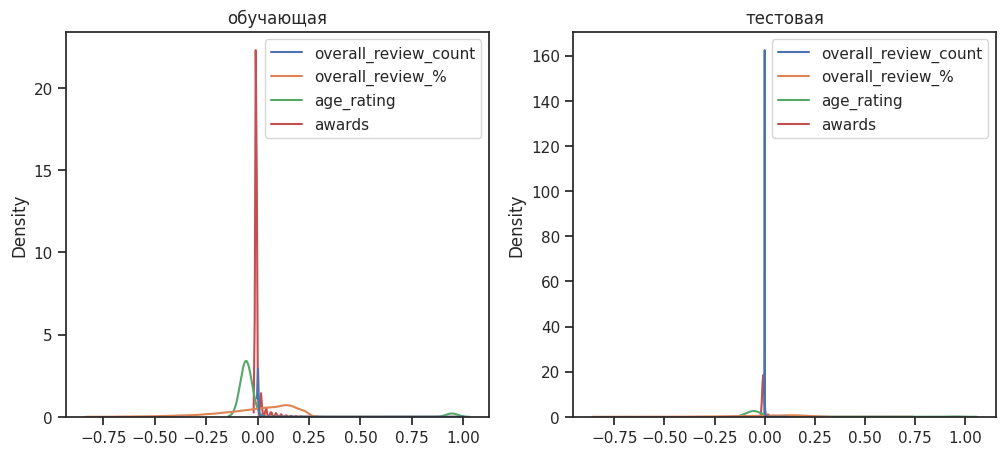

In [21]:
draw_kde(['overall_review_count', 'overall_review_%', 'age_rating', 'awards'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

### MinMax

In [22]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,dlc_available,age_rating,awards,overall_review_%,overall_review_count,recent_review_%,recent_review_count
count,42497.000000,42497.000000,42497.000000,40020.000000,40020.000000,5503.000000,5503.000000
mean,0.003610,0.055886,0.007549,0.771626,0.000309,0.811735,0.000828
std,0.023369,0.229705,0.030832,0.176720,0.006063,0.160747,0.013948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.680000,0.000001,0.734043,0.000018
50%,0.000000,0.000000,0.000000,0.810000,0.000006,0.851064,0.000073
75%,0.000000,0.000000,0.000000,0.910000,0.000034,0.925532,0.000280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


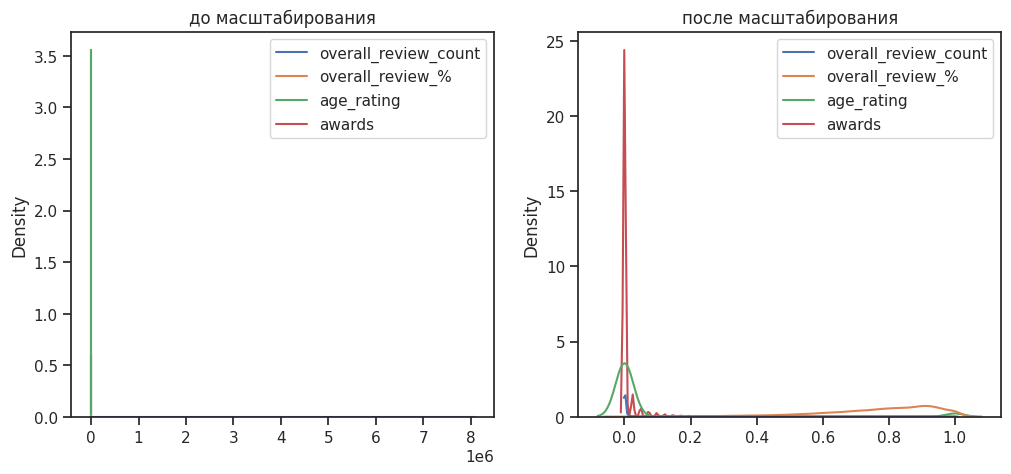

In [23]:
draw_kde(['overall_review_count', 'overall_review_%', 'age_rating', 'awards'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

### по Max

In [24]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,dlc_available,age_rating,awards,overall_review_%,overall_review_count,recent_review_%,recent_review_count
count,42497.000000,42497.000000,42497.000000,40020.000000,40020.000000,5503.000000,5503.000000
mean,0.003610,0.055886,0.007549,0.771626,0.000310,0.823031,0.000858
std,0.023369,0.229705,0.030832,0.176720,0.006063,0.151103,0.013947
min,0.000000,0.000000,0.000000,0.000000,0.000001,0.060000,0.000030
25%,0.000000,0.000000,0.000000,0.680000,0.000003,0.750000,0.000049
50%,0.000000,0.000000,0.000000,0.810000,0.000007,0.860000,0.000103
75%,0.000000,0.000000,0.000000,0.910000,0.000035,0.930000,0.000310
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


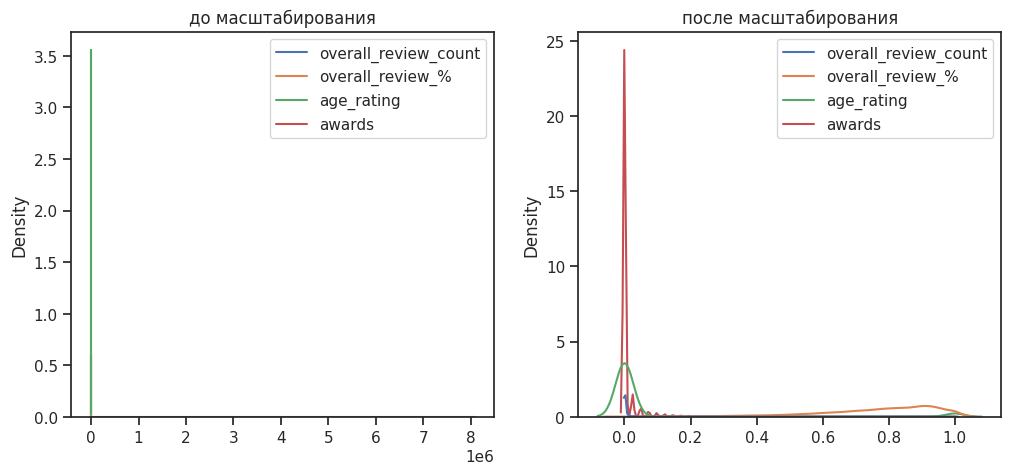

In [25]:
draw_kde(['overall_review_count', 'overall_review_%', 'age_rating', 'awards'], data, data_cs51_scaled, 'до масштабирования', 'после масштабирования')

## Отработка выбросов

In [26]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


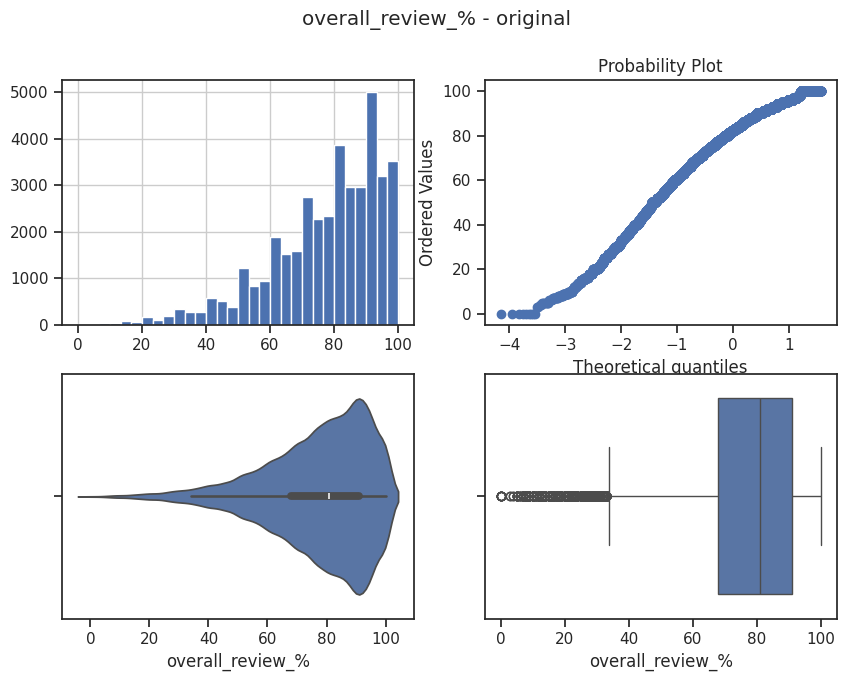

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


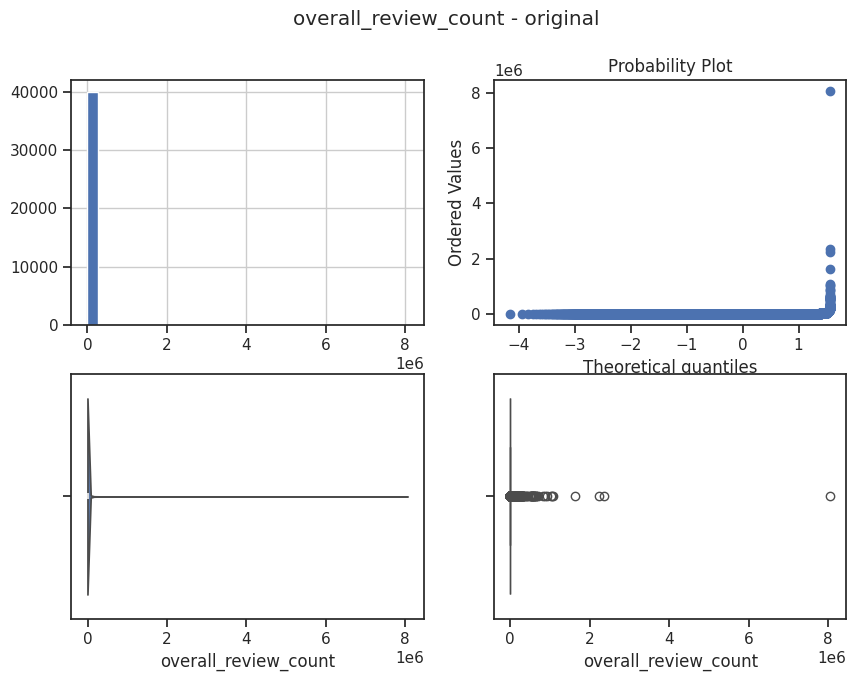

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


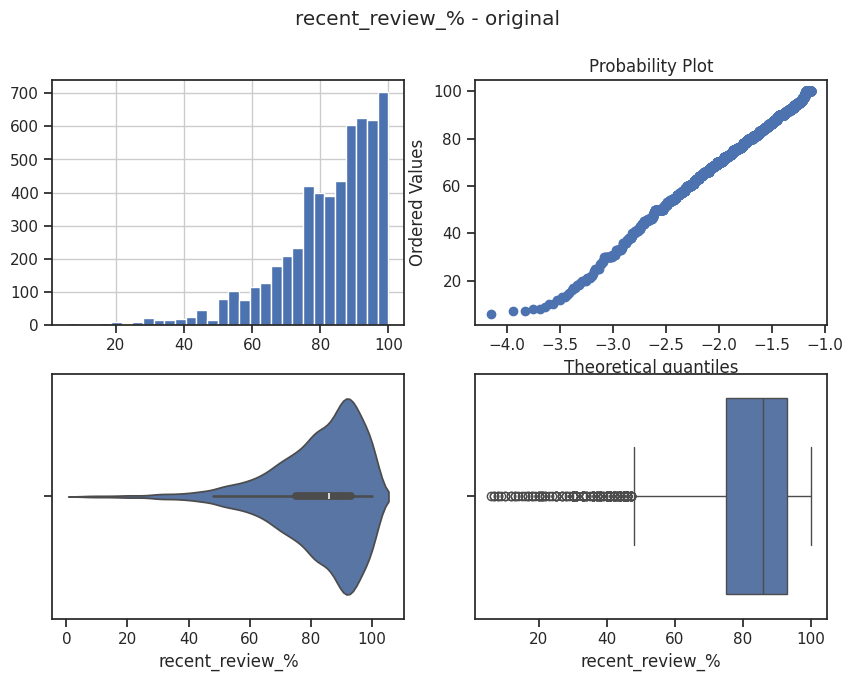

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


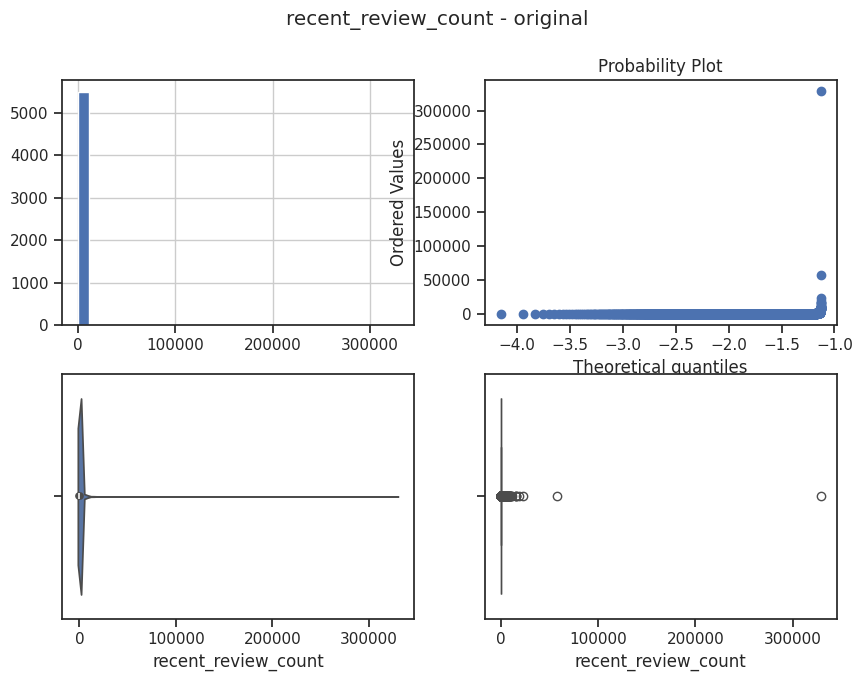

In [27]:
for col in data:
    if data.dtypes[col]=='float64':
        diagnostic_plots(data, col, col+' - original')

Видим, что ярко выражены квантили в overall_review_count и recent_review_count. Удалим выбросы.

In [28]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')

    return lower_boundary, upper_boundary

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


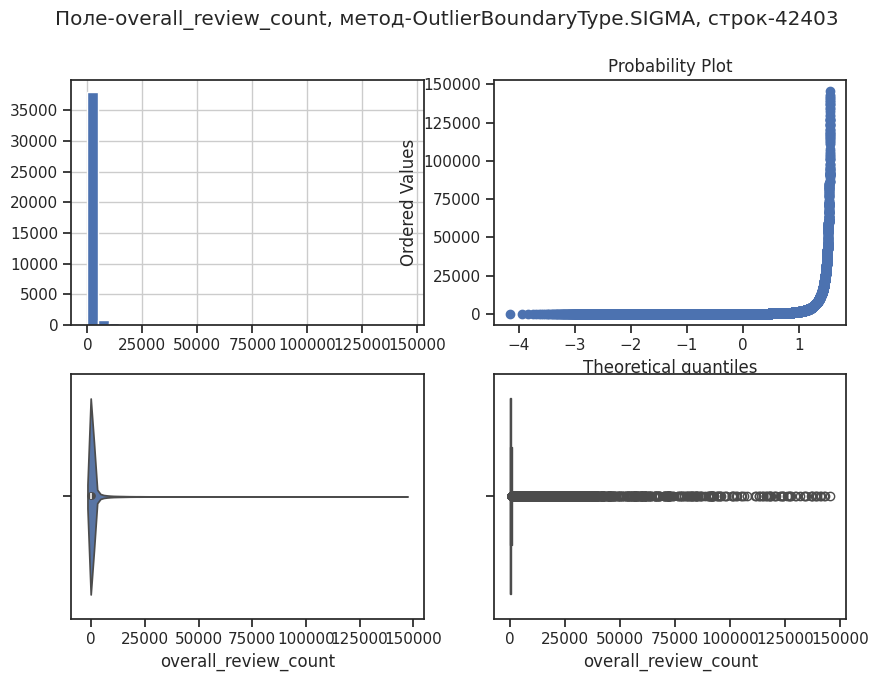

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


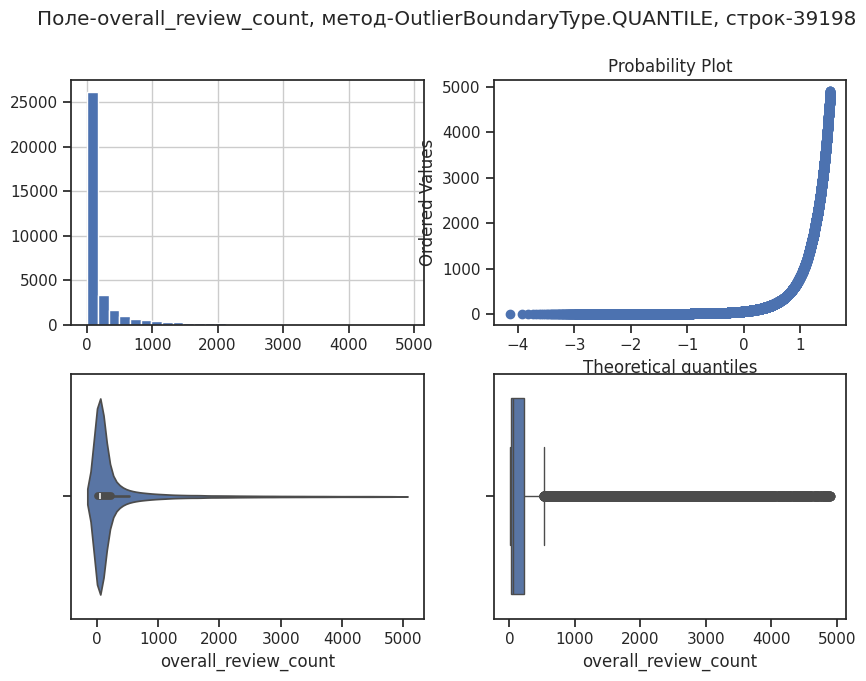

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


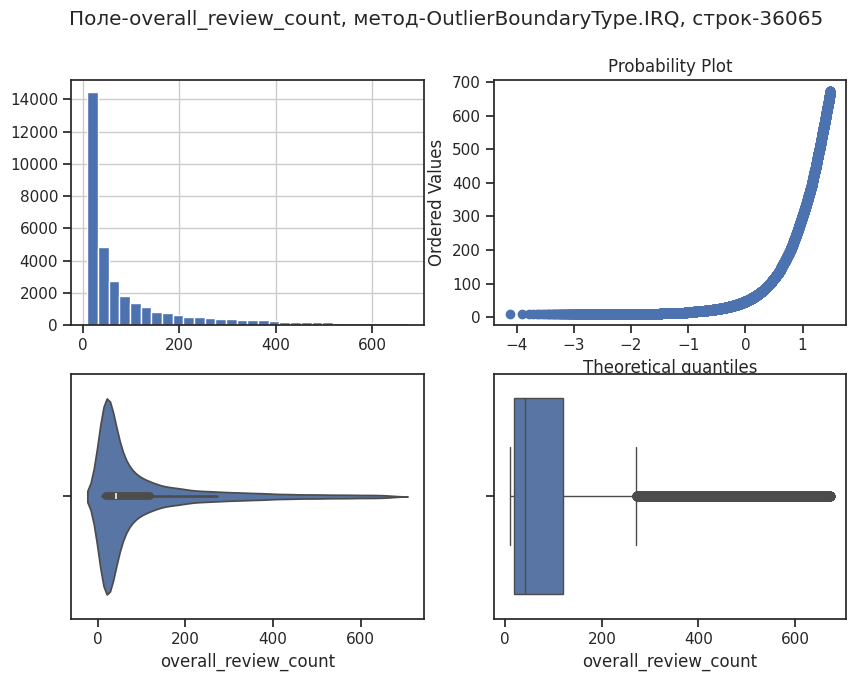

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


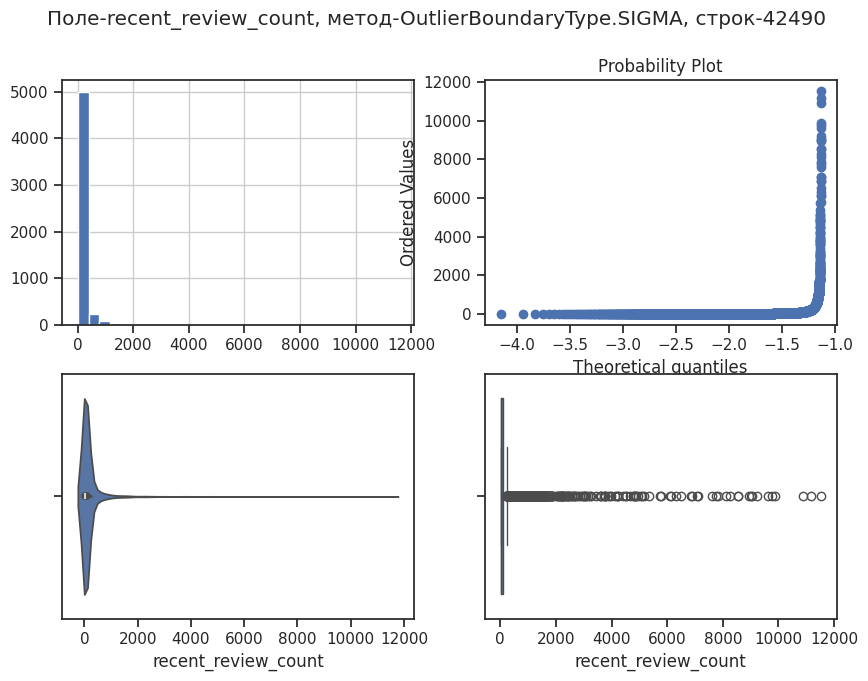

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


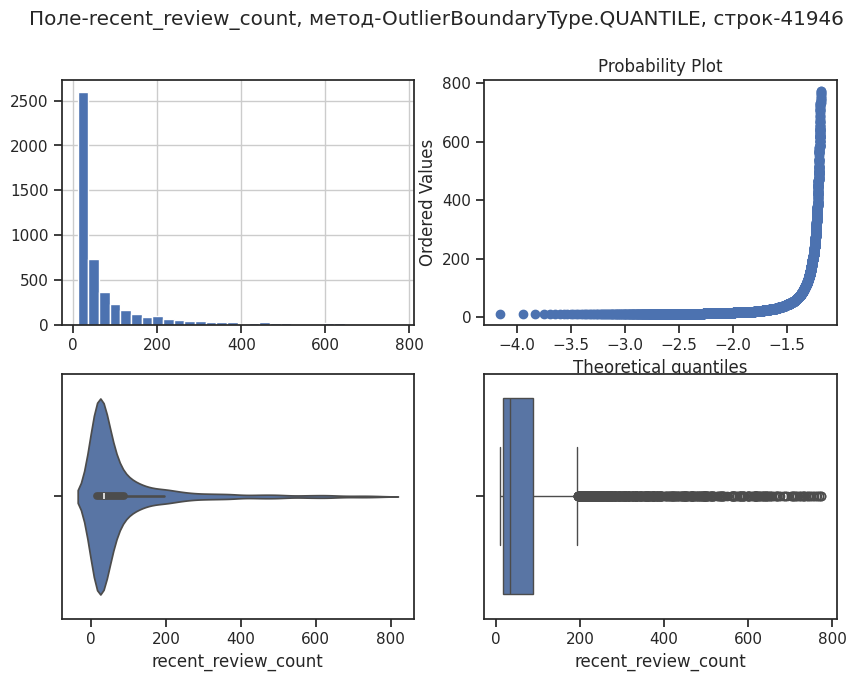

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


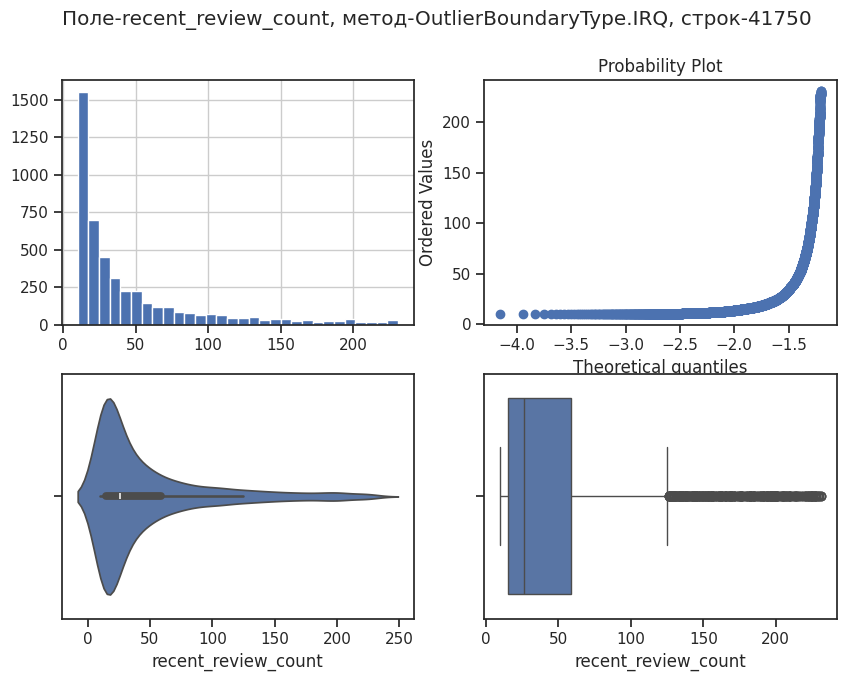

In [29]:
cols = ['overall_review_count', 'recent_review_count']

for col in cols:
  if data.dtypes[col]=='float64':
      for obt in OutlierBoundaryType:
          # Вычисление верхней и нижней границы
          lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
          # Флаги для удаления выбросов
          outliers_temp = np.where(data[col] > upper_boundary, True,
                              np.where(data[col] < lower_boundary, True, False))
          # Удаление данных на основе флага
          data_trimmed = data.loc[~(outliers_temp), ]
          title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
          diagnostic_plots(data_trimmed, col, title)

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


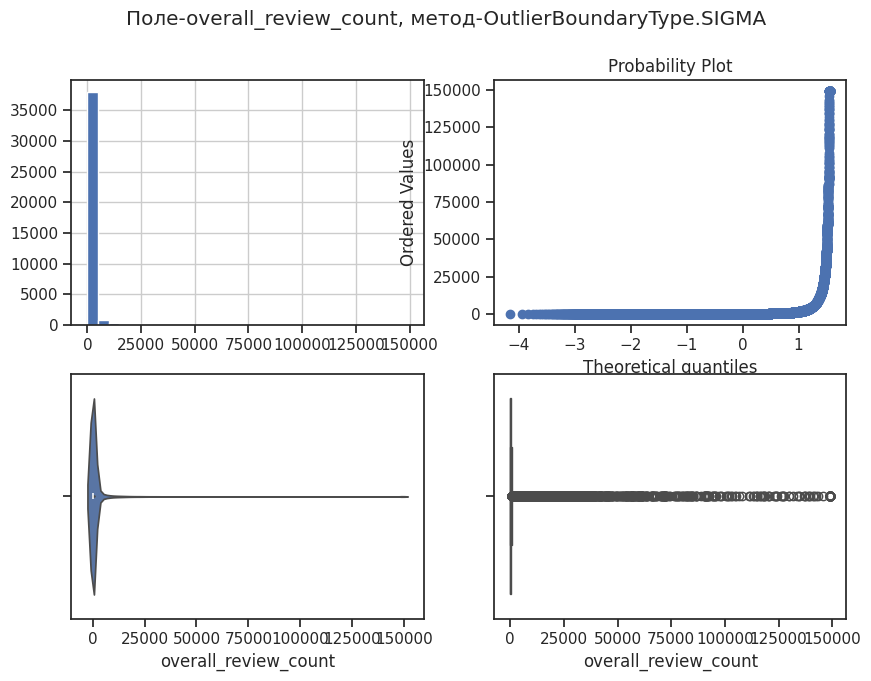

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


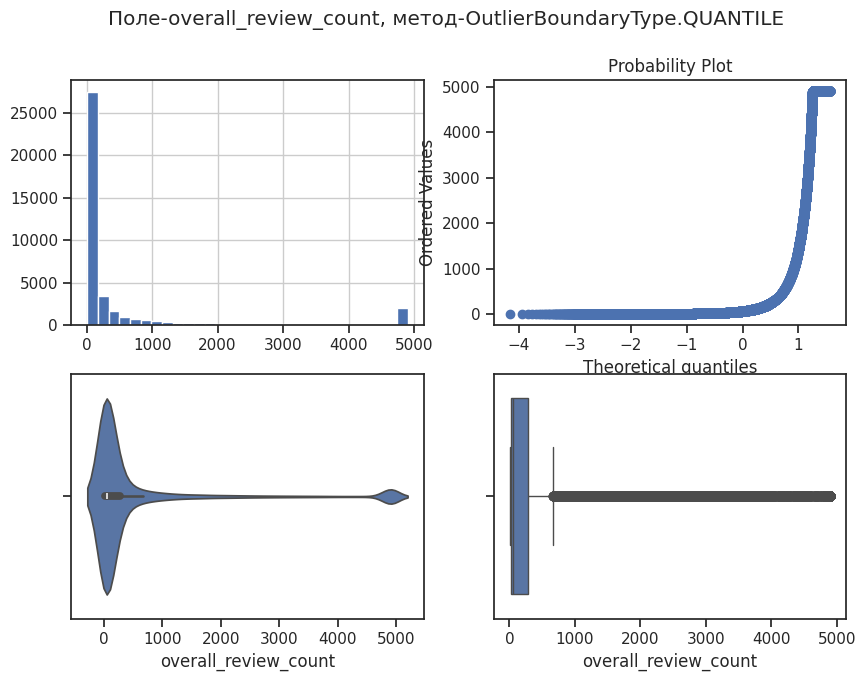

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


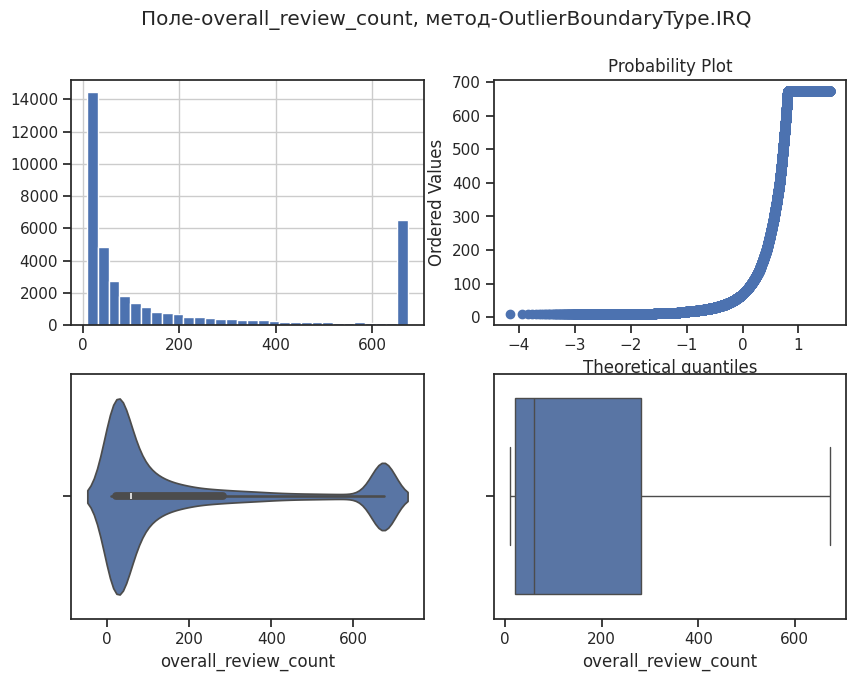

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


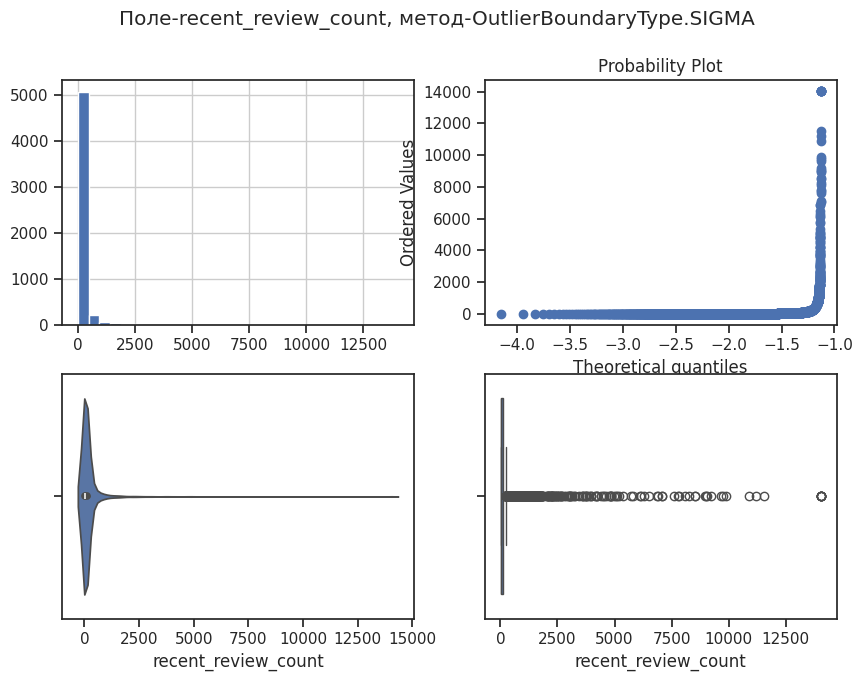

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


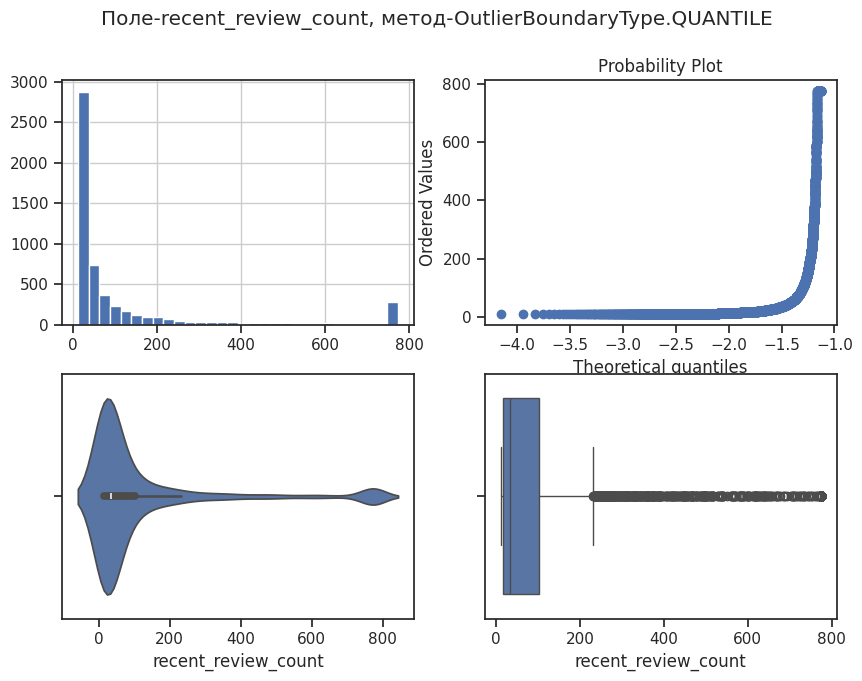

<ipython-input-26-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


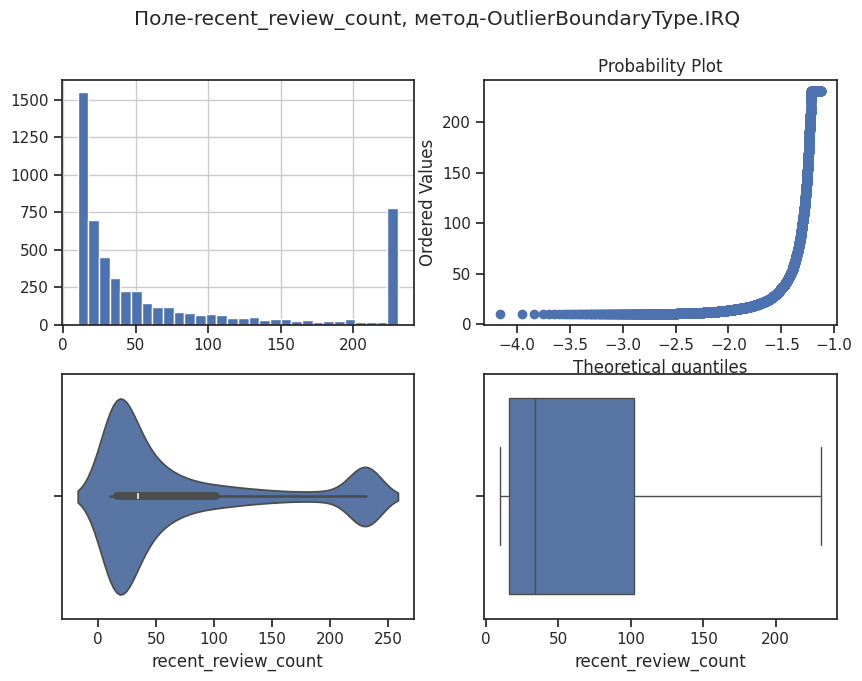

In [30]:
for col in cols:
  for obt in OutlierBoundaryType:
      data_copy = data.copy()
      # Вычисление верхней и нижней границы
      lower_boundary, upper_boundary = get_outlier_boundaries(data_copy, col, obt)
      # Изменение данных
      data_copy[col] = np.where(data_copy[col] > upper_boundary, upper_boundary,
                              np.where(data_copy[col] < lower_boundary, lower_boundary, data_copy[col]))
      title = 'Поле-{}, метод-{}'.format(col, obt)
      diagnostic_plots(data_copy, col, title)

## Обработка признака

В данных есть признак discounted_price. Это цена - изначально числовой признак, но в данных он представлен в виде строк с дополнительным символом цены. Также присутствует значение Free - его надо заменить на 0.

In [37]:
data.discounted_price.unique()

array(['Free', '₹3,999.00', '₹3,599.00', ..., '₹461.00', '₹1,075.00',
       '₹150,000.00'], dtype=object)

In [54]:
data['disc_pr'] = data['discounted_price'].apply(lambda x: int(x[1:-3].replace(",", "")) if x not in ['Free', np.nan] else 0)
data['disc_pr'] = data['disc_pr'].astype(int)

In [55]:
data[['discounted_price', 'disc_pr']].head(10)

,discounted_price,disc_pr
0,Free,0
1,Free,0
2,"₹3,999.00",3999
3,"₹3,599.00",3599
4,Free,0
5,"₹1,499.00",1499
6,"₹2,999.00",2999
7,Free,0
8,Free,0
9,"₹2,249.00",2249


## Отбор признаков

### preparation

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
cat_enc_le = le.fit_transform(data['overall_review'])

In [52]:
data['enc_overall_review']=le.transform(data['overall_review'])

In [56]:
data.head()

,app_id,title,release_date,genres,categories,developer,publisher,original_price,discount_percentage,discounted_price,...,linux_support,awards,overall_review,overall_review_%,overall_review_count,recent_review,recent_review_%,recent_review_count,enc_overall_review,disc_pr
0,730,Counter-Strike 2,"21 Aug, 2012","Action, Free to Play","Cross-Platform Multiplayer, Steam Trading Card...",Valve,Valve,NaN,NaN,Free,...,True,1,Very Positive,87.0,8062218.0,Mostly Positive,79.0,57466.0,8,0
1,570,Dota 2,"9 Jul, 2013","Action, Strategy, Free to Play","Steam Trading Cards, Steam Workshop, SteamVR C...",Valve,Valve,NaN,NaN,Free,...,True,0,Very Positive,81.0,2243112.0,Mostly Positive,72.0,23395.0,8,0
2,2215430,Ghost of Tsushima DIRECTOR'S CUT,"16 May, 2024","Action, Adventure","Single-player, Online Co-op, Steam Achievement...",Sucker Punch Productions,PlayStation PC LLC,NaN,NaN,"₹3,999.00",...,False,0,Very Positive,89.0,12294.0,NaN,NaN,NaN,8,3999
3,1245620,ELDEN RING,"24 Feb, 2022","Action, RPG","Single-player, Online PvP, Online Co-op, Steam...",FromSoftware Inc.,FromSoftware Inc.,NaN,NaN,"₹3,599.00",...,False,6,Very Positive,93.0,605191.0,Very Positive,94.0,7837.0,8,3599
4,1085660,Destiny 2,"1 Oct, 2019","Action, Adventure, Free to Play","Single-player, Online PvP, Online Co-op, Steam...",Bungie,Bungie,NaN,NaN,Free,...,False,0,Very Positive,80.0,594713.0,Mostly Positive,73.0,4845.0,8,0


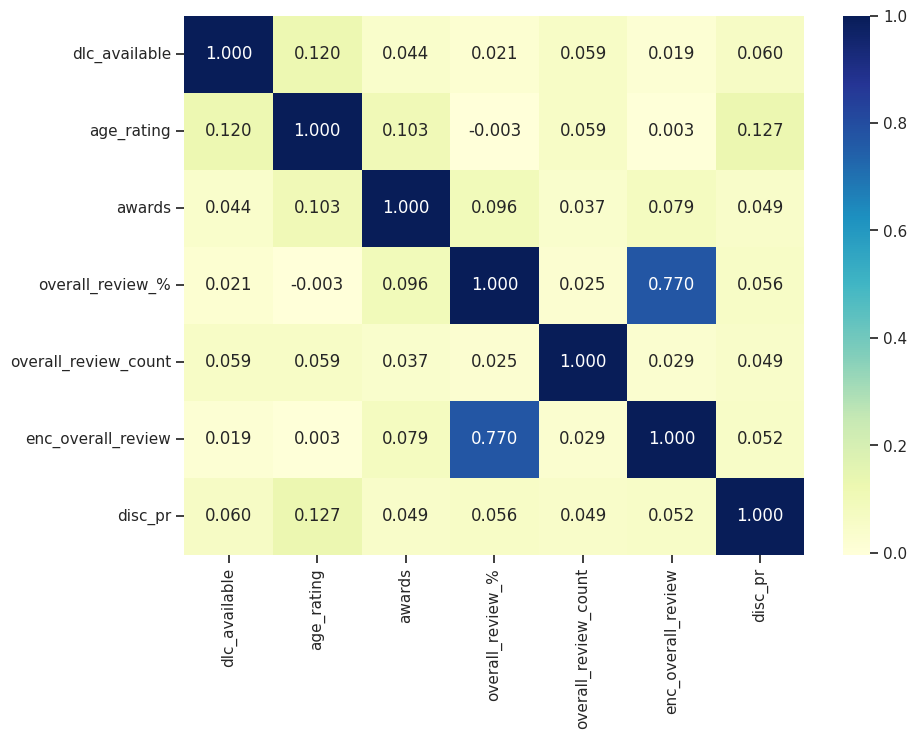

In [64]:
data_numeric = data[['dlc_available', 'age_rating', 'awards',
                     'overall_review_%', 'overall_review_count',
                     'enc_overall_review', 'disc_pr']]
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data_numeric.corr(), cmap='YlGnBu', annot=True, fmt='.3f')
plt.show()

Считаем целевым disc_pr - нужно определить скидку на игру

### Filter

In [65]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = df.corr()
    cr = cr.abs().unstack()
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.5]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [66]:
make_corr_df(data_numeric)

,f1,f2,corr
0,enc_overall_review,overall_review_%,0.7701
1,overall_review_%,enc_overall_review,0.7701


In [67]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [68]:
corr_groups(make_corr_df(data_numeric))

[['overall_review_%', 'enc_overall_review']]

Уберем пропуски в данных для успешного отбора признаков

In [70]:
data_numeric = data_numeric.dropna(subset=['overall_review_%', 'overall_review_count'])

In [71]:
data_numeric.isnull().sum()

dlc_available           0
age_rating              0
awards                  0
overall_review_%        0
overall_review_count    0
enc_overall_review      0
disc_pr                 0
dtype: int64

### Wrapper

In [72]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
data_X = data_numeric.drop(columns=['disc_pr'])
data_Y = data_numeric['disc_pr']
knn = KNeighborsRegressor(n_neighbors=3)

efs1 = EFS(knn,
           min_features=2,
           max_features=4,
           scoring='r2',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data_X, data_Y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 50/50

Best accuracy score: -1.04
Best subset (indices): (1, 2)
Best subset (corresponding names): ('age_rating', 'awards')


### Методы вложений (embedded methods)

In [73]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(data_X, data_Y)
# Коэффициенты регрессии
list(zip(list(data_X.columns.values), e_ls1.coef_))


[('dlc_available', 10.24588684718614),
 ('age_rating', 541.4121052523259),
 ('awards', 28.699923728194165),
 ('overall_review_%', -0.06433649569456228),
 ('overall_review_count', 0.0001955105065390509),
 ('enc_overall_review', 9.004209788936638)]

In [74]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(data_X, data_Y)
list(zip(list(data_X.columns.values), sel_e_ls1.get_support()))

[('dlc_available', True),
 ('age_rating', True),
 ('awards', True),
 ('overall_review_%', True),
 ('overall_review_count', True),
 ('enc_overall_review', True)]